# Project 1

## Part A

### 0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/fin_econometrics_2/project1`


In [2]:
Pkg.instantiate()
Pkg.status()

Status `~/Documents/fin_econometrics_2/project1/Project.toml`
  [6d3278bc] ARCHModels v2.3.4
  [fbb218c0] BSON v0.3.7
  [ad839575] Blink v0.12.8
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.0
⌃ [31c24e10] Distributions v0.25.102
  [587475ba] Flux v0.14.6
⌃ [38e38edf] GLM v1.8.3
  [c601a237] Interact v0.10.5
  [945b72a4] MarketData v0.13.12
  [429524aa] Optim v1.7.8
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [b0e4dd01] RollingFunctions v0.8.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.6
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.23.2
  [e88e6eb3] Zygote v0.6.67
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics v1.9.0
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [136]:
include("project_functions.jl")

trainW4 (generic function with 1 method)

### 1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.

In [4]:
using MarketData, Dates

We will load daily data of the Pfizer stock as it ought to be interesting to study volatility of a company which presumably was influenced greatly by the COVID19 virus.

In [5]:
PFE = yahoo("PFE", YahooOpt(period1 = DateTime(2010, 1, 1), period2 = now()))

3494×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2010-01-04 to 2023-11-17
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┤
│ 2010-01-04 │ 17.334  │ 17.9696 │ 17.3055 │ 17.9602 │ 10.6451  │ 5.4898644e7 │
│ 2010-01-05 │ 17.9507 │ 17.9602 │ 17.5996 │ 17.704  │ 10.4932  │ 4.5714931e7 │
│ 2010-01-06 │ 17.704  │ 17.8463 │ 17.5617 │ 17.6471 │ 10.4595  │ 4.3640975e7 │
│ 2010-01-07 │ 17.685  │ 17.7135 │ 17.5142 │ 17.5806 │ 10.4201  │ 4.1557112e7 │
│ 2010-01-08 │ 17.666  │ 17.7514 │ 17.5712 │ 17.723  │ 10.5045  │ 3.2049716e7 │
│ 2010-01-11 │ 17.8653 │ 17.9791 │ 17.7135 │ 17.8653 │ 10.5888  │ 3.4199665e7 │
│ 2010-01-12 │ 17.8368 │ 18.0171 │ 17.685  │ 17.8084 │ 10.5551  │ 4.3501847e7 │
│ 2010-01-13 │ 17.9032 │ 18.3112 │ 17.9032 │ 18.2258 │ 10.8025  │ 6.2728072e7 │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │ ⋮        │ ⋮           │
│ 2023-11-09 │ 30.49   │ 30.51   │ 29.63   

### 2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages


In [21]:
using Statistics, DataFrames, StatsPlots, TimeSeries, KernelDensity, RollingFunctions, DataFramesMeta

PLease note in the underneath transformations that both realized variance and realized volatility is considered. Namely, literature illustrates the usage of both with regards to HAR estimation as well as HAR forecasting.

Where Realized Variance can be denoted as:

$$ RV = \sum_{i=1}^n(r_i)^2  $$

And Realized Volatility as:

$$ RV = \sqrt{\sum_{i=1}^n(r_i)^2} $$

$r_i$ is the log return at time $i$, and $n$ is the number of observations.

In [22]:
df = DataFrame(PFE)
df = @transform(df, :ln_returns = [NaN; diff(log.(:AdjClose))]) #logarithmic returns of the closing price
df = @transform(df, :r_var = running(sum,:ln_returns .^2, 20)) #rolling sum of squared returns over a window of 20 observations
df = @transform(df, :r_vol = sqrt.(:r_var)) #Realized Volatility, square root of rolling variance
df = df[31:end,:]
first(df, 5)

5×10 DataFrame
 Row │ timestamp   Open     High     Low      Close    AdjClose  Volume     ln ⋯
     │ Date        Float64  Float64  Float64  Float64  Float64   Float64    Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2010-02-17  16.9355  16.945   16.6319  16.7647   10.0303  6.13998e7  -0 ⋯
   2 │ 2010-02-18  16.7742  16.8406  16.6509  16.8216   10.0644  6.02029e7   0
   3 │ 2010-02-19  16.907   17.1727  16.8216  17.0683   10.212   5.33933e7   0
   4 │ 2010-02-22  17.0588  17.2201  16.8691  17.0304   10.1893  6.1134e7   -0
   5 │ 2010-02-23  16.926   17.0209  16.7078  16.7647   10.0303  5.04584e7  -0 ⋯
                                                               3 columns omitted

In [23]:
stats = describe(df, :detailed)
println(stats)

10×11 DataFrame
 Row │ variable    mean        std        min          q25          median      q75         max         nunique  nmissing  eltype   
     │ Symbol      Union…      Union…     Any          Union…       Any         Union…      Any         Union…   Int64     DataType 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                          2010-02-17                2017-01-01              2023-11-17  3464            0  Date
   2 │ Open        32.0736     9.24846    13.4915      27.2747      32.2581     36.9751     60.6                        0  Float64
   3 │ High        32.3633     9.37173    13.5958      27.4739      32.4953     37.2445     61.71                       0  Float64
   4 │ Low         31.7837     9.12441    13.2827      27.1063      32.0256     36.6        59.83                       0  Float64
   5 │ Close       32.0754     9.25234    13.4156      27.2581  

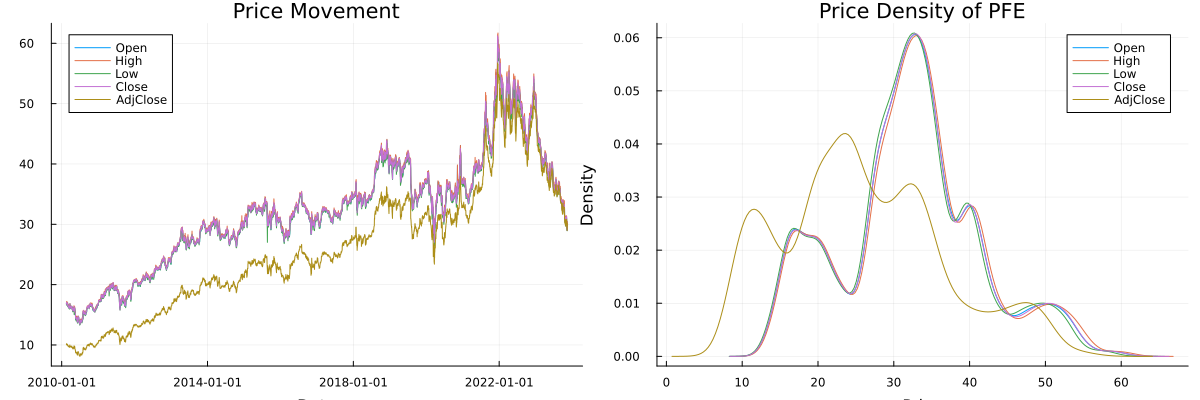

In [24]:
pl1 = plot(df.timestamp,df.Open, label="Open")
pl1 = plot!(df.timestamp,df.High, label="High")
pl1 = plot!(df.timestamp,df.Low, label="Low")
pl1 = plot!(df.timestamp,df.Close, label="Close")
pl1 = plot!(df.timestamp,df.AdjClose, label="AdjClose")
pl1 = plot!(legend=:topleft, xlabel="Date", ylabel="Price", title = "Price Movement")
pl2 = density(df.Open, label="Open")
pl2 = density!(df.High, label="High")
pl2 = density!(df.Low, label="Low")
pl2 = density!(df.Close, label="Close")
pl2 = density!(df.AdjClose, label="AdjClose")
pl2 = plot!(legend=:topright, xlabel="Price", ylabel="Density", title = "Price Density of PFE")
plot(pl1, pl2, size=(1200,400))

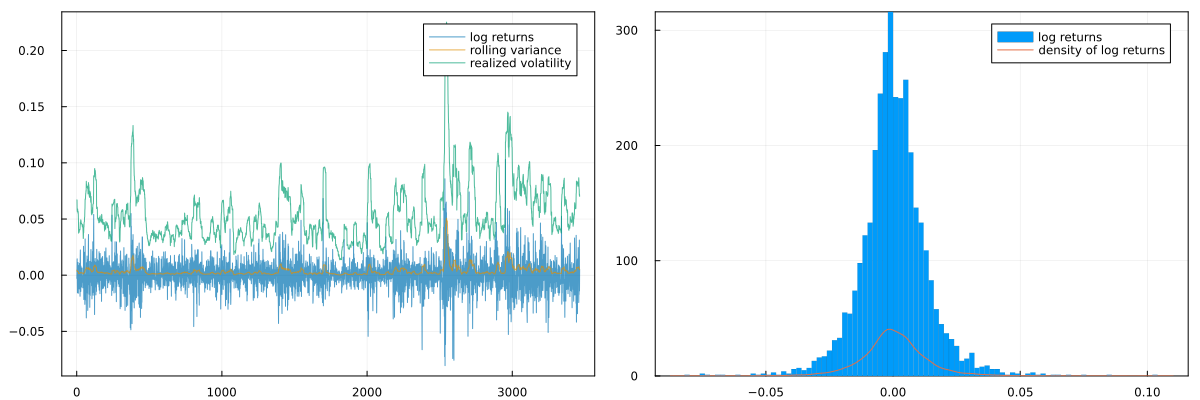

In [25]:
p1 = plot(df.ln_returns, line=(1., 0.7, :solid), label="log returns", palette=:seaborn_colorblind, size=(1000,400))
p1 = plot!(df.r_var, line=(1., 0.7, :solid), label="rolling variance", framestyle=:box)
p1 = plot!(df.r_vol, line=(1., 0.7, :solid), label="realized volatility", framestyle=:box)
p2 = histogram(df.ln_returns, l=0, framestyle=:box, label = "log returns")
p2 = density!(df.ln_returns, label="density of log returns")

plot(p1, p2, size=(1200,400))

In [26]:
size(df.r_vol)

(3464,)

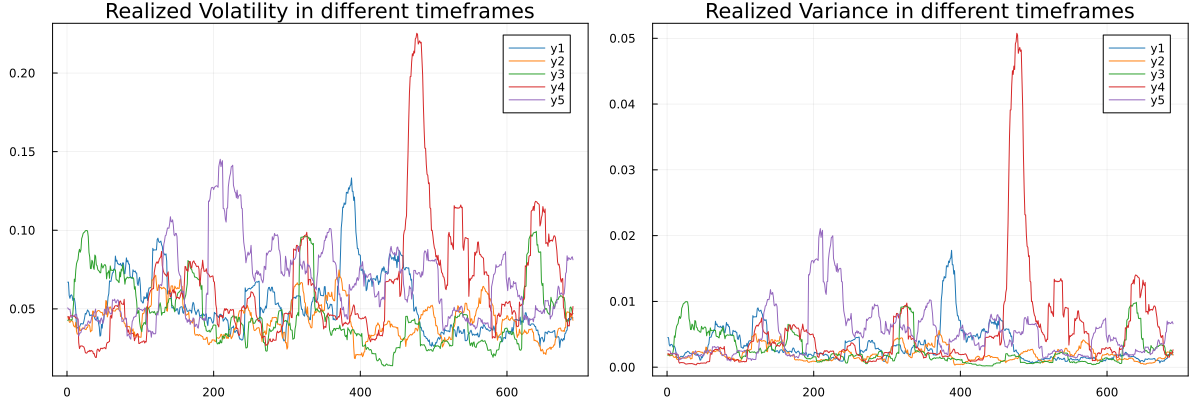

In [27]:
# empty array
subsample_r_vol = []
# loop
for t in 1:690:3450
    push!(subsample_r_vol, df.r_vol[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl3 = plot(subsample_r_vol, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Volatility in different timeframes")
# empty array
subsample_r_var = []
# loop
for t in 1:690:3450
    push!(subsample_r_var, df.r_var[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl4 = plot(subsample_r_var, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Variance in different timeframes")
plot(pl3, pl4, size=(1200,400))

### 3) Use `ARCHModels.jl` to **model** asset data and **forecast**.

#### GARCH

Univariate GARCH (p, q) model:

$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^q \beta_i \sigma_{t-i}^2$

In [28]:
using ARCHModels

Let us select the GARCH model based on the AIC criteria:

In [29]:
candidate_p = [1,2,3]
candidate_q = [1,2,3]

best_aic = Inf
garch_fit = nothing

for p in candidate_p
    for q in candidate_q
        model = fit(GARCH{p, q}, df.ln_returns)
        aic = StatsBase.aic(model) 
                
        if aic < best_aic
            best_aic = aic
            garch_fit = model
        end
    end
end

garch_fit


GARCH{1, 1} model with Gaussian errors, T=3464.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000558832  0.000192335  2.90551    0.0037
──────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   6.37835e-6  2.27762e-6   2.80045    0.0051
β₁  0.849219    0.0334686   25.3736     <1e-99
α₁  0.119501    0.0265423    4.50227    <1e-05
──────────────────────────────────────────────


In our case, the GARCH(1,1) seems to be the best based on the information criteria. Hence, I will predict the conditional variances for the next three time steps based on the GARCH(1,1).

In [30]:
forecasted_variances = predict.(garch_fit, :return, 1:3)

3-element Vector{Float64}:
 0.0005588323562273052
 0.0005588323562273052
 0.0005588323562273052

Differently, we can compare how well the predictions perform performing backtesting methods:

In [31]:
T = length(df.ln_returns);
windowsize = 1000;
vol = similar(df.ln_returns);
for t = windowsize+1:T-1
    m = fit(GARCH{1, 1}, df.ln_returns[t-windowsize:t]);
    vol[t+1] = predict(m, :volatility; level=0.05);
end
DQTest(df.ln_returns[windowsize+1:end], vol[windowsize+1:end], 0.05)

Engle and Manganelli's (2004) DQ test (out of sample)
-----------------------------------------------------
Population details:
    parameter of interest:   Wald statistic in auxiliary regression
    value under h_0:         0
    point estimate:          331.405

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-70

Details:
    sample size:                    2464
    number of lags:                 1
    VaR level:                      0.05
    DQ statistic:                   331.405


### 4) **Plot** forecasts.


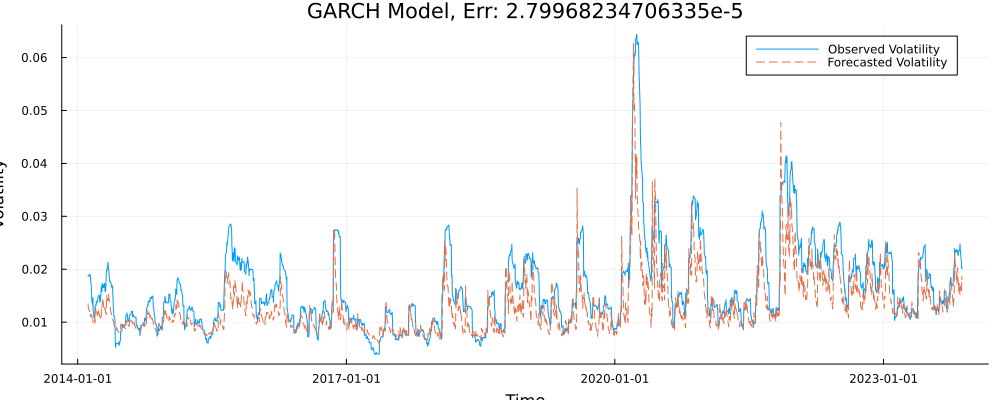

In [35]:
plot(df.timestamp[1005:T], df.r_vol[1005:end]/3.5, label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="GARCH Model, Err: $(mean(abs2, df.r_vol[1005:end]/3.5 - vol[1005:end]))", size = (1000, 400))

Note, the model is trained or estimated on the first 1000 observations and then predicted for the remainder of the observed values. In our case, only observations 1005:length(df.ln_returns) is illustrated in the graph. In addition, there is a shift with our calculated realized volatility (r_vol), potentially due to difference in calculation but if we divide our r_vol by 3.5 to align the prediction with our observations we see a seemingly accurate prediction.

## Part B

- *OLS* vs *ML* estimation HAR
    - Estimate coefficients with different approaches
    - Optim.jl vs Flux.jl
    - Discuss coefficients, show them in scatter, histograms
    - test different activations in NN
    - play around with regularizations
    - Make Q-Q plots, a table of performance

#### HAR

Let us first consider the HAR model:
$$ RV_t = \beta_0 + \beta_1  RV_{d,t} + \beta_2  RV_{w,t} + \beta_3  RV_{m,t} + \epsilon_t $$
where $RV_t$ can be denoted as:
realized variance, $RV_t = \sigma_t^2 $ or
realized volatility, $ RV_t = \sqrt{\sigma_t^2} $

Hence, we will first calculate daily, weekly and monthly Realized Volatilities:

In [36]:
HAR_regressors(df.r_vol)

3442×3 Matrix{Float64}:
 0.0403491  0.0403108  0.049439
 0.0420423  0.0408109  0.0483048
 0.0442856  0.0415242  0.0472718
 0.0471132  0.042853   0.0467529
 0.0466179  0.0440816  0.0462944
 0.0478077  0.0455733  0.0458058
 0.0493166  0.0470282  0.0453671
 0.0486817  0.0479074  0.0449344
 0.0479503  0.0480748  0.044598
 0.0456389  0.047879   0.0441054
 ⋮                     
 0.0822953  0.0808596  0.0750682
 0.0823209  0.081079   0.0760744
 0.0834591  0.0819068  0.077162
 0.0867335  0.0834182  0.0784128
 0.0833533  0.0836324  0.0795102
 0.0773366  0.0826407  0.080323
 0.0763233  0.0814411  0.0808641
 0.0711265  0.0789746  0.0808043
 0.0721515  0.0760582  0.0807471

We can now identify the predictors and target for our study.

In [45]:
predictors = HAR_regressors(df.r_vol)
target = df.r_vol[23:end]
size(predictors), size(target)

((3442, 3), (3442,))

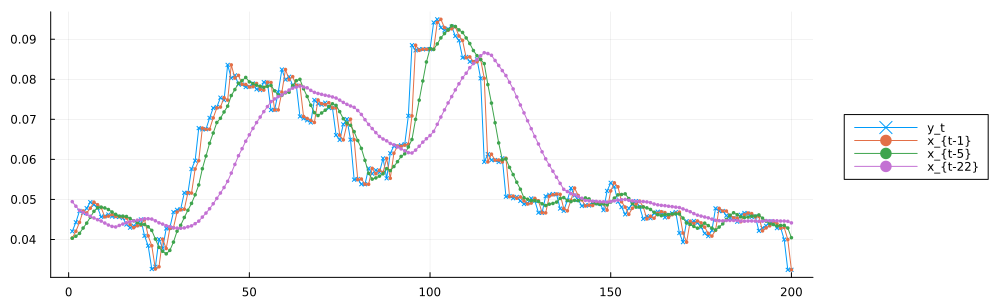

In [66]:
plt_data = plot(target[1:200]; label="y_t",  m=(2,:x), msw=0, size=(1000,300), legend=:outerright)
plt_data = plot!(predictors[1:200,1]; label="x_{t-1}", m=(2), msw=0)
plt_data = plot!(predictors[1:200,2]; label="x_{t-5}", m=(2), msw=0)
plt_data = plot!(predictors[1:200,3]; label="x_{t-22}", m=(2), msw=0)

##### OLS Estimator

$X′X\beta=X′y$

In [46]:
using GLM

In [47]:
data_har = DataFrame([target predictors], [:rv_t, :rv_d, :rv_w, :rv_m]);
first(data_har,5)

5×4 DataFrame
 Row │ rv_t       rv_d       rv_w       rv_m      
     │ Float64    Float64    Float64    Float64   
─────┼────────────────────────────────────────────
   1 │ 0.0420423  0.0403491  0.0403108  0.049439
   2 │ 0.0442856  0.0420423  0.0408109  0.0483048
   3 │ 0.0471132  0.0442856  0.0415242  0.0472718
   4 │ 0.0466179  0.0471132  0.042853   0.0467529
   5 │ 0.0478077  0.0466179  0.0440816  0.0462944

In [48]:
har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rv_t ~ 1 + rv_d + rv_w + rv_m

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00131631  0.000174849   7.53    <1e-13   0.000973487   0.00165913
rv_d          1.10025     0.0151406    72.67    <1e-99   1.07057       1.12994
rv_w         -0.0882582   0.0183606    -4.81    <1e-05  -0.124257     -0.0522595
rv_m         -0.0359374   0.00671974   -5.35    <1e-07  -0.0491125    -0.0227623
─────────────────────────────────────────────────────────────────────────────────

In [49]:
har_prediction = GLM.predict(har, ); # fit
first(har_prediction,5)

5-element Vector{Float64}:
 0.04037600307522537
 0.04223562825814996
 0.04467801046947322
 0.04769036195477426
 0.047053487622108564

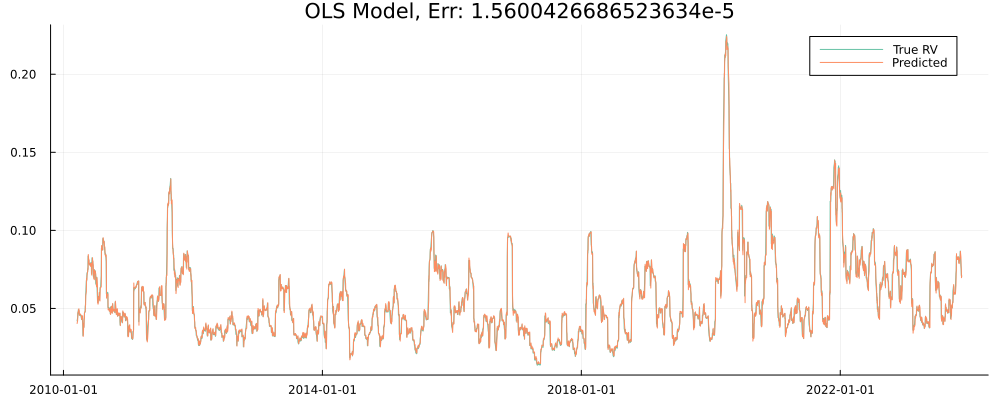

In [147]:
p1 = plot(df[23:end,:timestamp], data_har.rv_t, lab="True RV", leg=:topright, 
    title="OLS Model, Err: $(mean(abs2, data_har.rv_t - har_prediction))", palette=:Set2_3)
p1 = plot!(df[23:end,:timestamp], har_prediction, lab="Predicted", size = (1000, 400))

However, the above seems to be too good to be true as they are basically overlapping. Therefore, let's do some backtesting again to see it's ability to forecast.

In [51]:
T = length(data_har.rv_t);
windowsize = 1000;
ols_vol = similar(data_har.rv_t);
for t = windowsize+1:T-1
    window_data = data_har[t-windowsize:t, :]
    har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), window_data)
    ols_vol[t+1] = GLM.predict(har)[1]
end
DQTest(data_har.rv_t[windowsize+1:end], ols_vol[windowsize+1:end], 0.05)

Engle and Manganelli's (2004) DQ test (out of sample)
-----------------------------------------------------
Population details:
    parameter of interest:   Wald statistic in auxiliary regression
    value under h_0:         0
    point estimate:          128.474

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-26

Details:
    sample size:                    2442
    number of lags:                 1
    VaR level:                      0.05
    DQ statistic:                   128.474


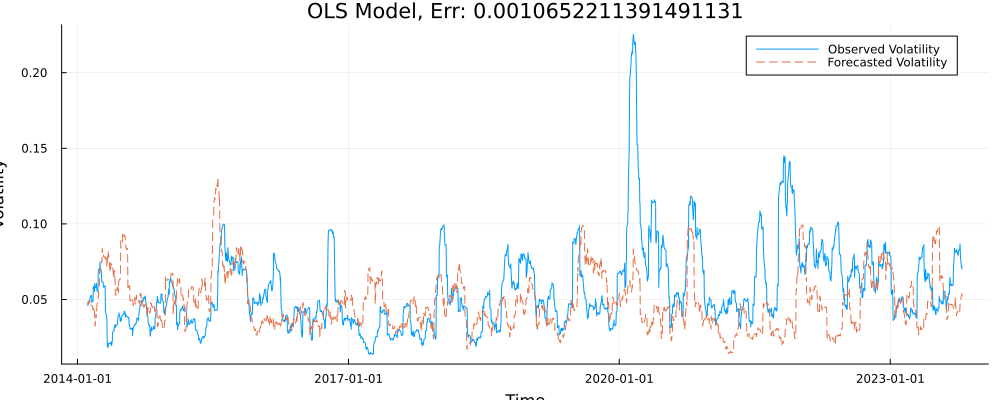

In [148]:
plot(df.timestamp[1005:T], data_har.rv_t[1005:end], label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], ols_vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="OLS Model, Err: $(mean(abs2, data_har.rv_t[1005:end] - ols_vol[1005:end]))", size = (1000, 400))

Here, we can clearly see a less accurate prediction of the previously implemented GARCH model. Nevertheless, still a pretty good prediction accuracy as we can also reject the $H_0$ meaning that the forecast accuracy of the two models being compared is significantly different.

### Optim

In [67]:
using Optim
using Distributions

In [69]:
# Optimize
result = optimize(params -> har_model(params, data_har), [0.1, 0.1, 0.1, 0.1], LBFGS())

# Extract the estimated parameters
estimated_params = result.minimizer

4-element Vector{Float64}:
  0.0013163058287152583
  1.100252451196926
 -0.08825823355754882
 -0.035937373800366844

In [71]:
T = length(data_har.rv_t);
windowsize = 1000;
optim_vol = similar(data_har.rv_t);
for t = windowsize+1:T-1
    window_data = data_har[t-windowsize:t, :]
    optim = optimize(params -> har_model(params, window_data), [0.1, 0.1, 0.1, 0.1], LBFGS())
    features = select(window_data, [:rv_d, :rv_w, :rv_m])
    optim_vol[t+1] = predict_har(estimated_params, features)[1]
end
DQTest(data_har.rv_t[windowsize+1:end], optim_vol[windowsize+1:end], 0.05)

Engle and Manganelli's (2004) DQ test (out of sample)
-----------------------------------------------------
Population details:
    parameter of interest:   Wald statistic in auxiliary regression
    value under h_0:         0
    point estimate:          128.474

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-26

Details:
    sample size:                    2442
    number of lags:                 1
    VaR level:                      0.05
    DQ statistic:                   128.474


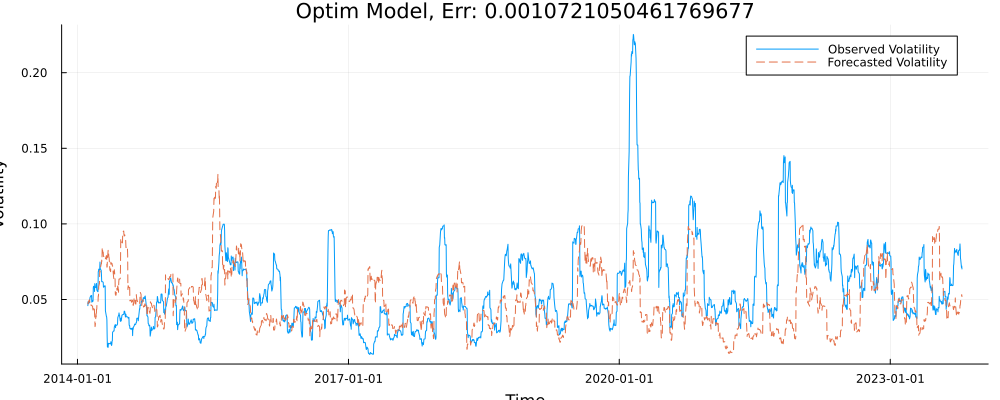

In [149]:
plot(df.timestamp[1005:T], data_har.rv_t[1005:end], label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], optim_vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="Optim Model, Err: $(mean(abs2, data_har.rv_t[1005:end] - optim_vol[1005:end]))", size = (1000, 400))

-------

### Flux

In [75]:
using Flux

OLS revised:

In [120]:
beta_har = OLSestimatorconst(target, predictors)

4-element Vector{Float64}:
  0.001316305829100969
  1.1002524511376783
 -0.08825823347048413
 -0.035937373834717116

In [121]:
yhat_har = permutedims(beta_har[2:end]' * predictors');

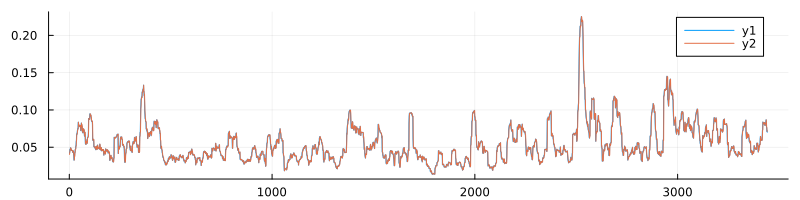

In [122]:
plt_data = plot(target; size=(800,200))
plt_data = plot!(predictors[:,1])

In [82]:
size(predictors)

(3442, 3)

In [83]:
xtrain = predictors[1:2750,:] |> permutedims .|> Float32
ytrain = target[1:2750] |> permutedims .|> Float32
xvalid = predictors[2751:3442,:] |> permutedims .|> Float32
yvalid = target[2751:3442] |> permutedims .|> Float32;

Note for self, the above transposes the matrices and converts the elements to 32-bit floating-point numbers.  

## FFNN

In [156]:
using StatsBase

standardization of data:

In [169]:
fit_xt = StatsBase.fit(ZScoreTransform, log.(xtrain); dims=2, center=true, scale=true)
fit_xv = StatsBase.fit(ZScoreTransform, log.(xvalid); dims=2, center=true, scale=true)
fit_yt = StatsBase.fit(ZScoreTransform, log.(ytrain); dims=2, center=true, scale=true)
fit_yv = StatsBase.fit(ZScoreTransform, log.(yvalid); dims=2, center=true, scale=true)

ZScoreTransform{Float32, Vector{Float32}}(1, 2, Float32[-2.7632768], Float32[0.3454383])

ZScoreTransform is a standardization method used to transform data into a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [170]:
xt_std = StatsBase.transform(fit_xt, log.(xtrain))
xv_std = StatsBase.transform(fit_xv, log.(xvalid))
yt_std = StatsBase.transform(fit_yt, log.(ytrain))
yv_std = StatsBase.transform(fit_yv, log.(yvalid))

1×692 Matrix{Float32}:
 -0.873075  -1.07665  -1.06012  -1.90016  …  0.347331  0.388752  0.308799

In [167]:
FFNN, losses11, losses12 = trainW3(xt_std, yt_std, xv_std, yv_std; nodes=[100,50], eta=0.001, n_epochs=500);

Epoch 20 	 Loss: 0.43899414 	 Test: 0.45215628
Epoch 40 	 Loss: 

0.1270454 	 Test: 0.15104191


Epoch 60 	 Loss: 0.08208939 	 Test: 0.10775378
Epoch 80 	 Loss: 

0.073145844 	 Test: 0.0984692


Epoch 100 	 Loss: 0.0691208 	 Test: 0.09363361
Epoch 120 	 Loss: 

0.0660483 	 Test: 0.089633696


Epoch 140 	 Loss: 0.063307285 	 Test: 0.086067066
Epoch 160 	 Loss: 

0.06085155 	 Test: 0.08284811


Epoch 180 	 Loss: 0.058687516 	 Test: 0.079923615
Epoch 200 	 Loss: 

0.056740813 	 Test: 0.07729256


Epoch 220 	 Loss: 0.05493619 	 Test: 0.07495358
Epoch 240 	 Loss: 

0.05331684 	 Test: 0.07275716


Epoch 260 	 Loss: 0.051869597 	 Test: 0.07081863
Epoch 280 	 Loss: 

0.05055748 	 Test: 0.06900885


Epoch 300 	 Loss: 0.04933646 	 Test: 0.06740992
Epoch 320 	 Loss: 

0.048299007 	 Test: 0.06598301


Epoch 340 	 Loss: 0.047324996 	 Test: 0.064619735
Epoch 360 	 Loss: 

0.046408497 	 Test: 0.06342176


Epoch 380 	 Loss: 0.04556861 	 Test: 0.06232186
Epoch 400 	 Loss: 

0.04481823 	 Test: 0.061351612


Epoch 420 	 Loss: 0.044146862 	 Test: 0.060385294
Epoch 440 	 Loss: 

0.043486428 	 Test: 0.05960993


Epoch 460 	 Loss: 0.042951405 	 Test: 0.05878197
Epoch 480 	 Loss: 

0.04241478 	 Test: 0.058081273


Epoch 500 	 Loss: 0.041929524 	 Test: 0.05740306


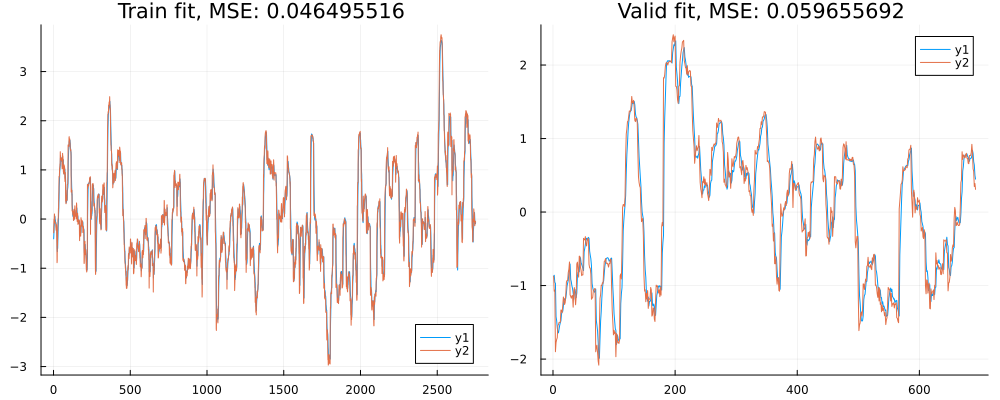

In [171]:
p1 = plot(FFNN(xt_std)', title="Train fit, MSE: $(Flux.Losses.mse(FFNN(xt_std),yt_std)) ",)
p1 = plot!(yt_std')
#
p2 = plot(FFNN(xv_std)', title="Valid fit, MSE: $(Flux.Losses.mse(FFNN(xv_std),yv_std)) ",)
p2 = plot!(yv_std');
plot(p1, p2, size=(1000, 400))

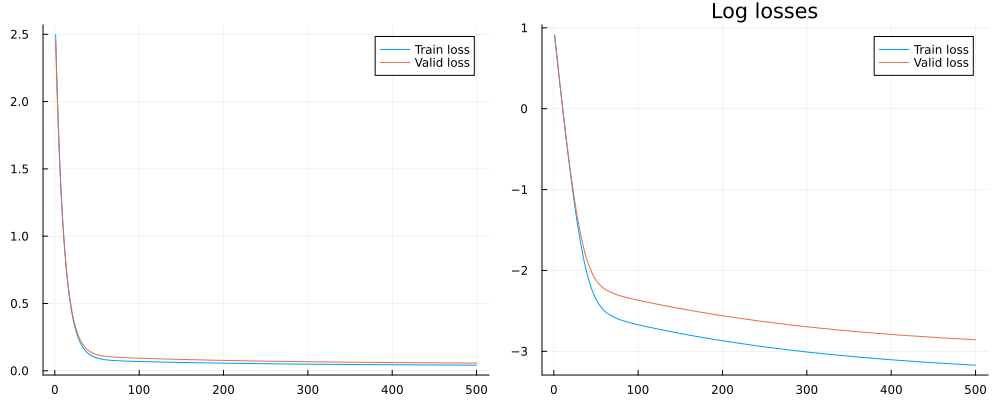

In [172]:
p11 = plot([losses11 losses12], labels=["Train loss" "Valid loss"])
p12 = plot(log.([losses11 losses12]), labels=["Train loss" "Valid loss"], title="Log losses") # might help at some cases
plot(p11, p12, size=(1000,400))

## RNN

In [179]:
xt_rnn = reshape(xt_std, 3, 1, :)
yt_rnn = reshape(yt_std, 1, 1, :)
xv_rnn = reshape(xv_std, 3, 1, :)
yv_rnn = reshape(yv_std, 1, 1, :);

Each "slice" along the third axis represents a sequence of length 3 for x and 1 for y, and the second dimension is used for processing elements within the sequence independently. This reshaping is often used in RNNs where the input is organized as sequences of data, and the network processes each sequence element iteratively. 

In [182]:
size(xt_std), size(yt_std)

((3, 2750), (1, 2750))

In [183]:
size(xt_rnn), size(yt_rnn)

((3, 1, 2750), (1, 1, 2750))

We now see the transformed 3D shape. 

In [186]:
mo1, mb1, lt1, lv1 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[50,30], eta=0.0001,
    n_epochs=200, verbose=30, maxpatience=20, drop=0.1f0, lambdaW=0.0001f0);

Epoch [1/200] 	 Training Loss 1.06 	 Validation Loss 1.05


Epoch [31/200] 	 Training Loss 0.63 	 Validation Loss 0.65


Epoch [61/200] 	 Training Loss 0.43 	 Validation Loss 0.47


Epoch [91/200] 	 Training Loss 0.33 	 Validation Loss 0.38


Epoch [121/200] 	 Training Loss 0.27 	 Validation Loss 0.32


Epoch [151/200] 	 Training Loss 0.23 	 Validation Loss 0.28


Epoch [181/200] 	 Training Loss 0.2 	 Validation Loss 0.24


Epoch [200/200] 	 Training Loss 0.19 	 Validation Loss 0.23


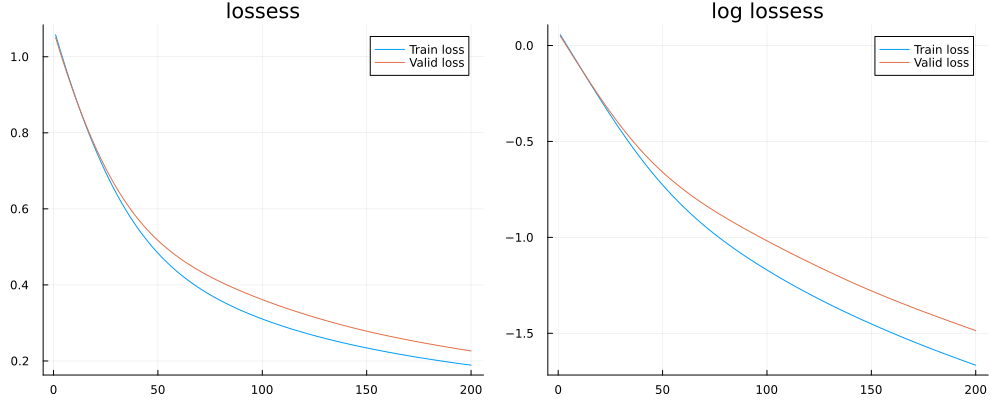

In [188]:
p3l = plot([lt1 lv1], labels=["Train loss" "Valid loss"], title = "lossess")
p4l = plot(log.([lt1 lv1]), labels=["Train loss" "Valid loss"], title = "log lossess")
plot(p3l, p4l, size=(1000,400))

In [189]:
Flux.reset!(mo1) # reset hidden
mo1(xt_rnn) # warm-up model
yhat_mo1_valid = mo1(xv_rnn) |> vec;

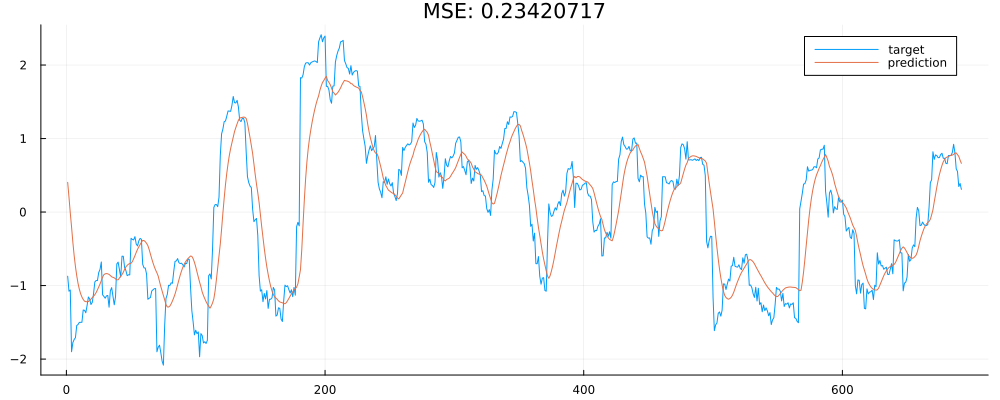

In [191]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="prediction", title="MSE: $(Flux.mse(pred_fit, yv_rnn))", size = (1000,400))

---

In [97]:
beta_har = OLSestimatorconst(yt_std', xt_std')

4×1 Matrix{Float64}:
  0.006173529702914542
  1.0845464916037733
 -0.07511933485482966
 -0.029479787810340444

In [98]:
yhat_beta = [ones(size(xv_std',1)) xv_std'] * beta_har;

In [99]:
Flux.mse(yhat_beta, yv_std')

0.0017409525722914395

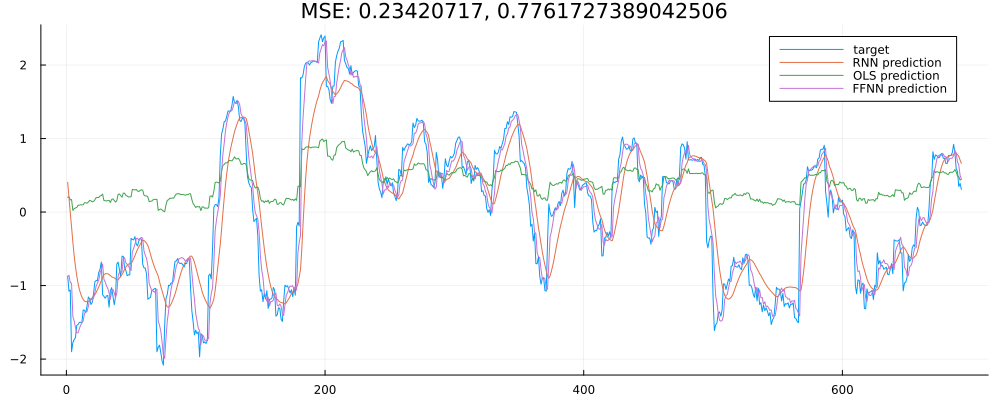

In [196]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="RNN prediction", title="MSE: $(Flux.mse(pred_fit, yv_rnn)), $(Flux.mse(yhat_beta, yv_rnn[:]))")
plt_vld = plot!(yhat_beta; label="OLS prediction", size = (1000,400))
plt_vld = plot!(FFNN(xv_std)'; label = "FFNN prediction")

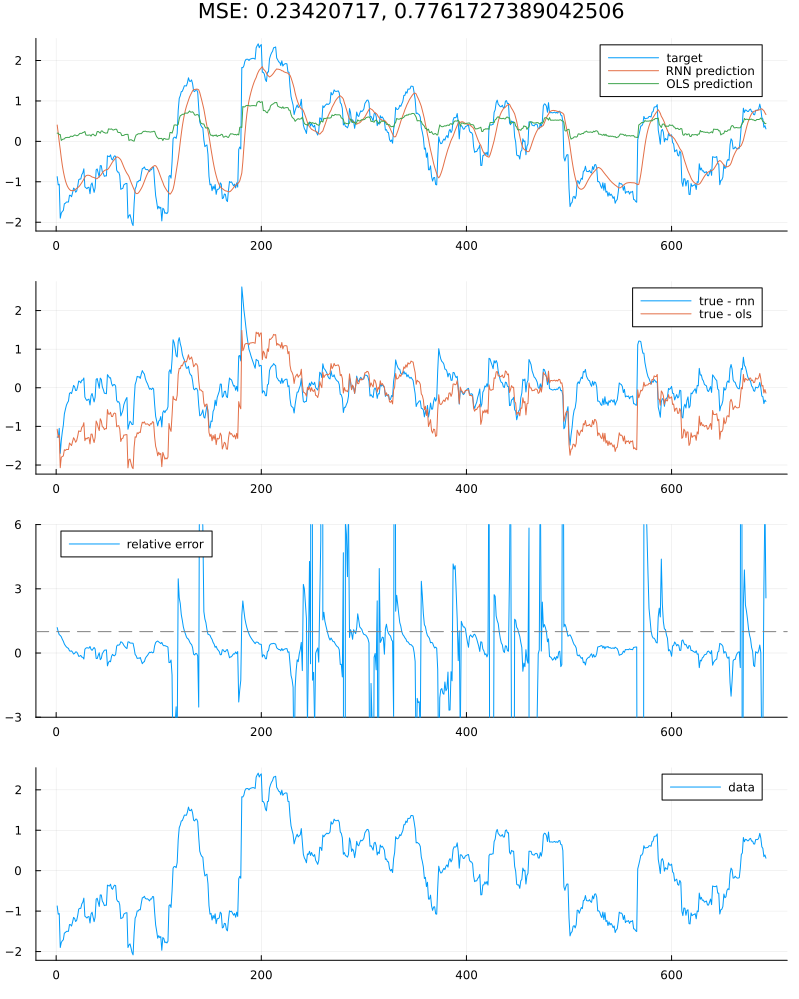

In [194]:
px1 = plot(yv_rnn[:] .- pred_fit[:], label="true - rnn")
px1 = plot!(yv_rnn[:]  .- yhat_beta, label="true - ols")
#plot!(pred_fit[:] .- yhat_beta, label="rnn - ols")
px2 = plot((yv_rnn[:] .- pred_fit[:]) ./ (yv_rnn[:]  .- yhat_beta), ylim=(-3,6), label="relative error")
px2 = hline!([1], line=(1,:dash,:grey), label="")
px3 = plot(yv_rnn[:], label="data")
plot(plt_vld, px1, px2, px3, layout=(4,:), size=(800,1000))

In [102]:
ksplits = 4
idx_t = collect(1:1000)
valid_ratio = 0.3
train_valid_split_size = div(idx_t[end], ksplits)

250

In [103]:
valid_size = floor(Int, train_valid_split_size * valid_ratio)

75

In [104]:
train_size = train_valid_split_size - valid_size

175

In [105]:
# train and valid overlap from previous folds
[((1 + i*train_size):(train_size + i * train_size), (train_size + 1 + i*train_size):(train_size + valid_size + i * train_size)) for i in 0:4]

5-element Vector{Tuple{UnitRange{Int64}, UnitRange{Int64}}}:
 (1:175, 176:250)
 (176:350, 351:425)
 (351:525, 526:600)
 (526:700, 701:775)
 (701:875, 876:950)

In [106]:
[
    ((1 + i*(train_size+valid_size)):(train_size + i*(train_size+valid_size)), 
    (train_size + 1 + i*(train_size+valid_size)):(valid_size + train_size + i*(train_size+valid_size))) for i in 0:3
]

4-element Vector{Tuple{UnitRange{Int64}, UnitRange{Int64}}}:
 (1:175, 176:250)
 (251:425, 426:500)
 (501:675, 676:750)
 (751:925, 926:1000)

In [107]:
# how push! and append! functions work:
a = Float64[]
b = []
@time for i in 1:4
    push!(a, i)
    append!(b, i)
end

  0.009336 seconds (29.07 k allocations: 1.966 MiB, 99.41% compilation time)


In [108]:
a, b

([1.0, 2.0, 3.0, 4.0], Any[1, 2, 3, 4])

In [109]:
n_ensembles = 5
arr_models = []
ens_loss_t = []
ens_loss_v = []
for iens in 1:n_ensembles
    println("> Running ensemble $iens")
    @time mo0, mb0, lt0, lv0 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[10,30], eta=0.0001, n_epochs=200, 
        verbose=1, maxpatience=30, drop=0.1, lambdaW=0.00003f0)
    # _ saving
    push!(arr_models, mb0) # saving the best model for each ensemble
    push!(ens_loss_t, lt0)
    push!(ens_loss_v, lv0)
end

> Running ensemble 1


Epoch [200/200] 	 Training Loss 0.0 	 Validation Loss 0.01
 13.537897 seconds (76.69 M allocations: 15.245 GiB, 23.42% gc time, 7.68% compilation time)
> Running ensemble 2


Epoch [200/200] 	 Training Loss 0.02 	 Validation Loss 0.07
 13.517757 seconds (74.34 M allocations: 15.117 GiB, 24.17% gc time)
> Running ensemble 3


Epoch [200/200] 	 Training Loss 0.01 	 Validation Loss 0.04
 11.941136 seconds (74.34 M allocations: 15.117 GiB, 24.73% gc time)
> Running ensemble 4


Epoch [200/200] 	 Training Loss 0.01 	 Validation Loss 0.03
 11.707813 seconds (74.34 M allocations: 15.117 GiB, 24.85% gc time)
> Running ensemble 5


Epoch [200/200] 	 Training Loss 0.02 	 Validation Loss 0.06
 12.928678 seconds (74.34 M allocations: 15.117 GiB, 23.68% gc time)


In [110]:
arr_models

5-element Vector{Any}:
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable

In [111]:
m_pars = Flux.params(arr_models[1]) |> collect .|> vec

9-element Vector{Vector{Float32}}:
 [-0.14819704, -0.11897714, -0.20904775, -0.19916193, 0.14536028, -0.25768292, -0.18473588, 0.26126012, 0.29266334, -0.35517788  …  -0.09527196, -0.19661456, 0.05105813, -0.30456024, 0.35291618, -0.34920344, 0.112715416, 0.0006658629, 0.039668985, -0.18535343]
 [0.36182722, -0.26961192, -0.17311117, -0.023817021, 0.006754709, 0.19873516, -0.027501263, 0.29275307, 0.3194335, 0.14307019  …  0.21730101, 0.14565855, -0.18693918, -0.22185585, -0.064749435, 0.20280568, -0.012231789, 0.11463357, 0.30199382, -0.044503346]
 [0.014853629, 0.013214735, 0.0071620704, -0.0050018053, -0.0031487783, 0.007892693, 0.0011143506, 0.00757852, 0.007880333, 0.008172965  …  0.015253861, 0.013162172, 0.007205845, -0.005054236, -0.0031466992, 0.008059477, 0.00090995536, 0.007978663, 0.008937315, 0.007979903]
 [0.01244757, 0.0035540476, 0.017330281, 0.019591838, 0.016387481, 0.018029746, 0.015659042, -0.01727696, 0.018625759, -0.013159074]
 [0.018774664, -0.02021369, 0.0163979

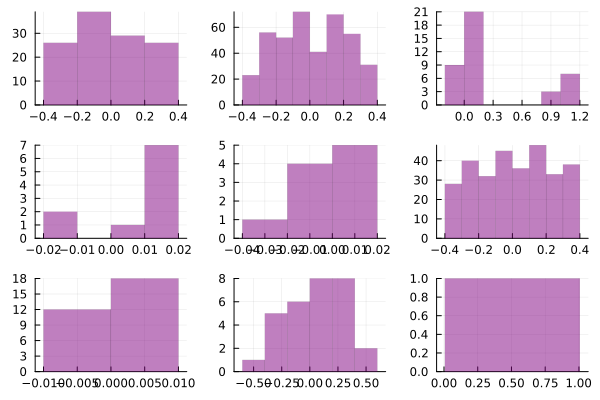

In [112]:
plot(histogram.(m_pars)..., line=(0), fill=(1, 0.5, :purple), legend=:none)

In [113]:
yhat_array = []
for m in arr_models
    Flux.reset!(m) # reset model
    m(xt_rnn) # warm-up the model for time step prior prediction
    push!(yhat_array, m(xv_rnn))
end

In [114]:
yhat_ensemble = mean(yhat_array) |> vec;

In [115]:
size(xtrain), size(ytrain)

((3, 2750), (1, 2750))

In [116]:
har_coefs = OLSestimatorconst(yt_std', xt_std')
yhat_har_valid = (xv_std' * har_coefs[2:end]) .+ har_coefs[1];

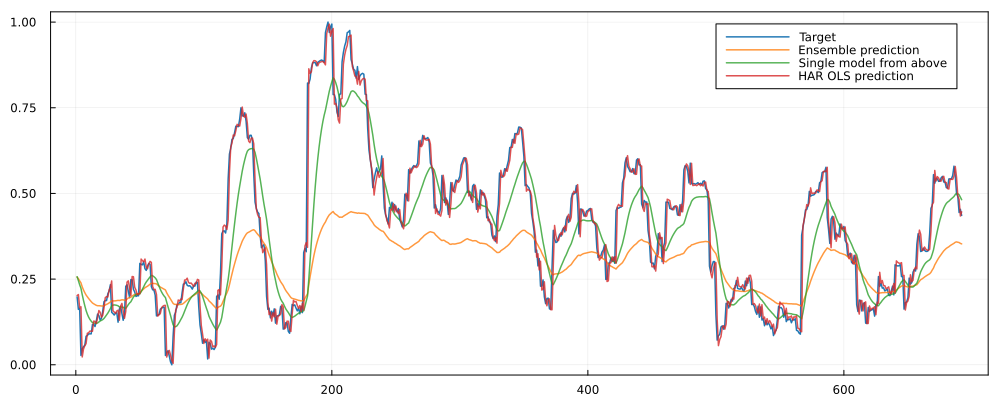

In [117]:
plot(yv_rnn |> vec, label="Target", size=(1000,400), framestyle=:box, line=(1.5, 1.0, :solid), palette=:tab10)
plot!(yhat_ensemble, label="Ensemble prediction", line=(1.5, 0.8, :solid))
plot!(yhat_mo1_valid, label="Single model from above", line=(1.5, 0.8, :solid))
plot!(yhat_har_valid, label="HAR OLS prediction", line=(1.5, 0.8, :solid))

In [118]:
println(" HAR: ", Flux.mse(yhat_har_valid, yv_rnn |> vec), "\n",
    " Ens: ", Flux.mse(yhat_ensemble, yv_rnn |> vec), "\n",
    " M1:  ", Flux.mse(yhat_mo1_valid, yv_rnn |> vec), "\n")

 HAR: 0.0017409525722914398
 Ens: 0.03533084
 M1:  0.012726216



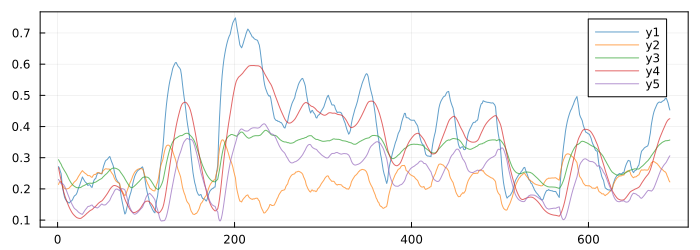

In [119]:
# plot individual predictions
plot(yhat_array .|> vec, framestyle=:box, line=(1, 0.7, :solid), palette=:tab10, size=(700,250))

In [ ]:
Pkg.activate()